<a href="https://colab.research.google.com/github/gptix/DS-Unit-2-Applied-Modeling/blob/master/module4/ASSIGNMENT_Jud_Taylor_LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

## Ingest Data

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    # DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    DATA_PATH = 'https://raw.githubusercontent.com/gptix/Project2/master/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd

# I extracted these column names from the text file 
# https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names
# I added the column 'poisonous', which was unlabeled in the original set.

colnames = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?',
            'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
            'gill-color', 'stalk-shape', 'stalk-root', 
            'stalk-surface-above-ring', 'stalk-surface-below-ring',
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
            'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 
            'population', 'habitat']

filename = 'agaricus-lepiota.data?token=AFCZYWEJZMR7ABZFRB62GKK6AEJIM'

df = pd.read_csv(DATA_PATH + filename, header=None, names=colnames)
df.shape

(8124, 23)

In [0]:
df_bak = df.copy()

In [0]:
# df = df_bak.copy()

## Examine Data

In [5]:
df.head()
df.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Wrangle Data


### Replace single-letter codes with full words, for readability.
These will be encoded as integers anyway.

In [0]:
df['cap-shape'] = df['cap-shape'].map({'b' : 'bell', 'c' : 'conical', 'x' : 'convex', 'f' : 'flat', 'k' : 'WYknobbed', 's' : 'sunken'})
df['cap-surface'] = df['cap-surface'].map({'f' : 'fibrous', 'g' : 'grooves', 'y' : 'scaly', 's' : 'smooth'})
df['cap-color'] = df['cap-color'].map({'n' : 'brown', 'b' : 'buff', 'c' : 'cinnamon', 'g' : 'gray', 'r' : 'green', 'p' : 'pink', 'u' : 'purple', 'e' : 'red', 'w' : 'white', 'y' : 'yellow'})
df['bruises?'] = df['bruises?'].map({'t' : 'bruises', 'f' : 'no'})
df['odor'] = df['odor'].map({'a' : 'almond', 'l' : 'anise', 'c' : 'creosote', 'y' : 'fishy', 'f' : 'foul', 'm' : 'musty', 'n' : 'none', 'p' : 'pungent', 's' : 'spicy'})
df['gill-attachment'] = df['gill-attachment'].map({'a' : 'attached', 'd' : 'descending', 'f' : 'free', 'n' : 'notched'})
df['gill-spacing'] = df['gill-spacing'].map({'c' : 'close', 'w' : 'crowded', 'd' : 'distant'})
df['gill-size'] = df['gill-size'].map({'b' : 'broad', 'n' : 'narrow'})
df['gill-color'] = df['gill-color'].map({'k' : 'black', 'n' : 'brown', 'b' : 'buff', 'h' : 'chocolate', 'g' : 'gray', 'r' : 'green', 'o' : 'orange', 'p' : 'pink', 'u' : 'purple', 'e' : 'red', 'w' : 'white', 'y' : 'yellow'})
df['stalk-shape'] = df['stalk-shape'].map({'e' : 'enlarging', 't' : 'tapering'})
df['stalk-root'] = df['stalk-root'].map({'b' : 'bulbous', 'c' : 'club', 'u' : 'cup', 'e' : 'equal', 'z' : 'rhizomorphs', 'r' : 'rooted', '?' : 'missing'})
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map({'f' : 'fibrous', 'y' : 'scaly', 'k' : 'silky', 's' : 'smooth'})
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map({'f' : 'fibrous', 'y' : 'scaly', 'k' : 'silky', 's' : 'smooth'})
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map({'n' : 'brown', 'b' : 'buff', 'c' : 'cinnamon', 'g' : 'gray', 'o' : 'orange', 'p' : 'pink', 'e' : 'red', 'w' : 'white', 'y' : 'yellow'})
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map({'n' : 'brown', 'b' : 'buff', 'c' : 'cinnamon', 'g' : 'gray', 'o' : 'orange', 'p' : 'pink', 'e' : 'red', 'w' : 'white', 'y' : 'yellow'})
df['veil-type'] = df['veil-type'].map({'p' : 'partial', 'u' : 'universal'})
df['veil-color'] = df['veil-color'].map({'n' : 'brown', 'o' : 'orange', 'w' : 'white', 'y' : 'yellow'})
df['ring-number'] = df['ring-number'].map({'n' : 'none', 'o' : 'one', 't' : 'two'})
df['ring-type'] = df['ring-type'].map({'c' : 'cobwebby', 'e' : 'evanescent', 'f' : 'flaring', 'l' : 'large', 'n' : 'none', 'p' : 'pendant', 's' : 'sheathing', 'z' : 'zone'})
df['spore-print-color'] = df['spore-print-color'].map({'k' : 'black', 'n' : 'brown', 'b' : 'buff', 'h' : 'chocolate', 'r' : 'green', 'o' : 'orange', 'u' : 'purple', 'w' : 'white', 'y' : 'yellow'})
df['population'] = df['population'].map({'a' : 'abundant', 'c' : 'clustered', 'n' : 'numerous', 's' : 'scattered', 'v' : 'several', 'y' : 'solitary'})
df['habitat'] = df['habitat'].map({'g' : 'grasses', 'l' : 'leaves', 'm' : 'meadows', 'p' : 'paths', 'u' : 'urban', 'w' : 'waste', 'd' : 'woods'})

### More wrangling.

In [0]:
def wrangle(frame):
  # replace dashes in column names with underscores
  frame.columns = [colname.replace('-','_') for colname in frame.columns]
  frame['poisonous'] = frame['poisonous'] == 'p'

In [26]:
wrangle(df)

df.head()
df.columns

Index(['poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises?',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [27]:
df.head()

,poisonous,cap_shape,cap_surface,cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,True,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,False,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,False,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,True,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,False,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## Make a profile report

In [0]:
# Get Pandas Profiling Report
# pfr = pandas_profiling.ProfileReport(df)
# pfr.to_file("df_report.html") 

## Identify X and y

I aim to predict whether a mushroom is poisonous.

In [28]:
# I choose to predict 'poisonous'.
target = 'poisonous'

features = list(set(df.columns) - set([target]))

print(features)
y = df[target]

X = df[features]

X

['bruises?', 'veil_type', 'gill_size', 'gill_spacing', 'cap_surface', 'habitat', 'gill_attachment', 'stalk_color_above_ring', 'stalk_color_below_ring', 'spore_print_color', 'odor', 'stalk_shape', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'ring_number', 'gill_color', 'ring_type', 'stalk_root', 'cap_shape', 'veil_color', 'population', 'cap_color']


,bruises?,veil_type,gill_size,gill_spacing,cap_surface,habitat,gill_attachment,stalk_color_above_ring,stalk_color_below_ring,spore_print_color,odor,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,ring_number,gill_color,ring_type,stalk_root,cap_shape,veil_color,population,cap_color
0,bruises,partial,narrow,close,smooth,urban,free,white,white,black,pungent,enlarging,smooth,smooth,one,black,pendant,equal,convex,white,scattered,brown
1,bruises,partial,broad,close,smooth,grasses,free,white,white,brown,almond,enlarging,smooth,smooth,one,black,pendant,club,convex,white,numerous,yellow
2,bruises,partial,broad,close,smooth,meadows,free,white,white,brown,anise,enlarging,smooth,smooth,one,brown,pendant,club,bell,white,numerous,white
3,bruises,partial,narrow,close,scaly,urban,free,white,white,black,pungent,enlarging,smooth,smooth,one,brown,pendant,equal,convex,white,scattered,white
4,no,partial,broad,crowded,smooth,grasses,free,white,white,brown,none,tapering,smooth,smooth,one,black,evanescent,equal,convex,white,abundant,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,no,partial,broad,close,smooth,leaves,attached,orange,orange,buff,none,enlarging,smooth,smooth,one,yellow,pendant,missing,WYknobbed,orange,clustered,brown
8120,no,partial,broad,close,smooth,leaves,attached,orange,orange,buff,none,enlarging,smooth,smooth,one,yellow,pendant,missing,convex,brown,several,brown
8121,no,partial,broad,close,smooth,leaves,attached,orange,orange,buff,none,enlarging,smooth,smooth,one,brown,pendant,missing,flat,orange,clustered,brown
8122,no,partial,narrow,close,scaly,leaves,free,white,white,white,fishy,tapering,smooth,silky,one,buff,evanescent,missing,WYknobbed,white,several,brown


## Find majority class frequency


In [29]:
y.value_counts(normalize=True).max()

0.517971442639094

The majority class frequency is >= 50% and < 70%.

I'll use accuracy as an initial metric.

Given the importance of **avoiding** poison, I may try to use **precision** as a metric later.

There is no time-based feature.

I'll use a random split.

## Split into train, val, set

In [30]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=1984)
train, val = train_test_split(train, test_size=0.2, random_state=1984)

print(train.shape)
print(val.shape)
test.shape

(5199, 23)
(1300, 23)


(1625, 23)

## Split train, val, test into X and y

In [0]:
# target - 'poisonous' # defined above
# features # defined above

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_val = val[features]
y_val = val[target]

## Define a pipeline


In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=3)
)

## Fit the model built by the pipeline.

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['bruises?', 'veil_type', 'gill_size',
                                      'gill_spacing', 'cap_surface', 'habitat',
                                      'gill_attachment',
                                      'stalk_color_above_ring',
                                      'stalk_color_below_ring',
                                      'spore_print_color', 'odor',
                                      'stalk_shape', 'stalk_surface_above_ring',
                                      'stalk_surface_below_ring', 'ring_number',
                                      'gill_color', 'ring_type', 'stalk_...
dtype: int64}],
                                return_df=True, verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=3, max_features=None,
                            

FInd the validation accuracy.

In [34]:
print('Validation Accuracy: ', pipeline.score(X_val, y_val))

Validation Accuracy:  0.9907692307692307


## Vizualize the tree

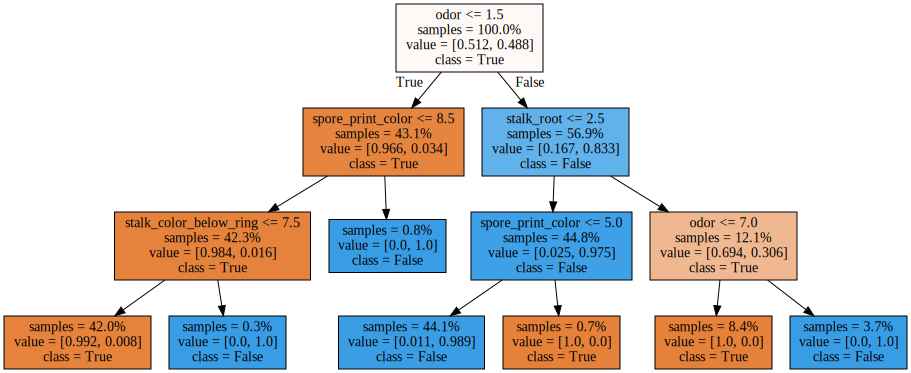

In [35]:
# Vizualize Decision Tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    out_file = None,
    feature_names = X_train.columns,
    class_names = y.unique().astype(str),
    filled = True,
    impurity=False,
    proportion=True,
)

graphviz.Source(dot_data)

## ROC Curve

In [37]:
y_val
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:,-1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
pd.DataFrame({
    'False Postivie Rate' : fpr,
    'True Positive Rate' : tpr,
    'Thresholds' : thresholds
})

,False Postivie Rate,True Positive Rate,Thresholds
0,0.000000,0.000000,2.000000
1,0.000000,0.101911,1.000000
2,0.017857,1.000000,0.989107
3,0.818452,1.000000,0.008242
4,1.000000,1.000000,0.000000


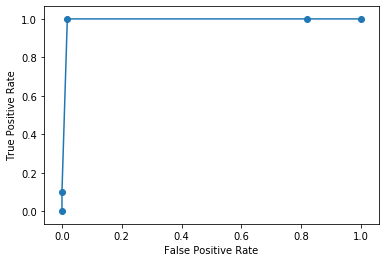

In [38]:
# Receiver Operating Chrcteristic plt
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba)

0.9919813466787989

In [0]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72


import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72 # INCREASE FOR FIAL PUB TO 144


In [47]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature ='odor'
isolated = pdp_isolate(model=pipeline,
                       dataset = X_val, 
                       model_features = X_val.columns, 
                       feature= feature)

TypeError: ignored

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Annual Income'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

## Description of data:

https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names



```
# 1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In the following references a set of rules (given below) were
	learned for this data set which may serve as a point of
	comparison for other researchers.

	Duch W, Adamczak R, Grabczewski K (1996) Extraction of logical rules
	from training data using backpropagation networks, in: Proc. of the
	The 1st Online Workshop on Soft Computing, 19-30.Aug.1996, pp. 25-30,
	available on-line at: http://www.bioele.nuee.nagoya-u.ac.jp/wsc1/

	Duch W, Adamczak R, Grabczewski K, Ishikawa M, Ueda H, Extraction of
	crisp logical rules using constrained backpropagation networks -
	comparison of two new approaches, in: Proc. of the European Symposium
	on Artificial Neural Networks (ESANN'97), Bruge, Belgium 16-18.4.1997,
	pp. xx-xx

	Wlodzislaw Duch, Department of Computer Methods, Nicholas Copernicus
	University, 87-100 Torun, Grudziadzka 5, Poland
	e-mail: duch@phys.uni.torun.pl
	WWW     http://www.phys.uni.torun.pl/kmk/
	
	Date: Mon, 17 Feb 1997 13:47:40 +0100
	From: Wlodzislaw Duch <duch@phys.uni.torun.pl>
	Organization: Dept. of Computer Methods, UMK

	I have attached a file containing logical rules for mushrooms.
	It should be helpful for other people since only in the last year I
	have seen about 10 papers analyzing this dataset and obtaining quite
	complex rules. We will try to contribute other results later.

	With best regards, Wlodek Duch
	________________________________________________________________

	Logical rules for the mushroom data sets.

	Logical rules given below seem to be the simplest possible for the
	mushroom dataset and therefore should be treated as benchmark results.

	Disjunctive rules for poisonous mushrooms, from most general
	to most specific:

	P_1) odor=NOT(almond.OR.anise.OR.none)
	     120 poisonous cases missed, 98.52% accuracy

	P_2) spore-print-color=green
	     48 cases missed, 99.41% accuracy
         
	P_3) odor=none.AND.stalk-surface-below-ring=scaly.AND.
	          (stalk-color-above-ring=NOT.brown) 
	     8 cases missed, 99.90% accuracy
         
	P_4) habitat=leaves.AND.cap-color=white
	         100% accuracy     

	Rule P_4) may also be

	P_4') population=clustered.AND.cap_color=white

	These rule involve 6 attributes (out of 22). Rules for edible
	mushrooms are obtained as negation of the rules given above, for
	example the rule:

	odor=(almond.OR.anise.OR.none).AND.spore-print-color=NOT.green

	gives 48 errors, or 99.41% accuracy on the whole dataset.

	Several slightly more complex variations on these rules exist,
	involving other attributes, such as gill_size, gill_spacing,
	stalk_surface_above_ring, but the rules given above are the simplest
	we have found.


4. Relevant Information:
    This data set includes descriptions of hypothetical samples
    corresponding to 23 species of gilled mushrooms in the Agaricus and
    Lepiota Family (pp. 500-525).  Each species is identified as
    definitely edible, definitely poisonous, or of unknown edibility and
    not recommended.  This latter class was combined with the poisonous
    one.  The Guide clearly states that there is no simple rule for
    determining the edibility of a mushroom; no rule like ``leaflets
    three, let it be'' for Poisonous Oak and Ivy.

5. Number of Instances: 8124

6. Number of Attributes: 22 (all nominally valued)

7. Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

8. Missing Attribute Values: 2480 of them (denoted by "?"), all for
   attribute #11.

9. Class Distribution: 
    --    edible: 4208 (51.8%)
    -- poisonous: 3916 (48.2%)
    --     total: 8124 instances
```

